# Importing Requeired Libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cv2

%matplotlib inline

# Showing ECG Test Image

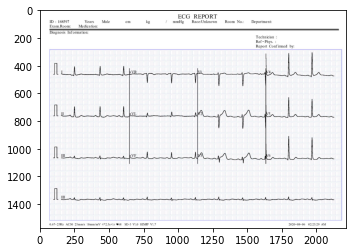

In [13]:
#We will simply used imread() function of opencv to read images
ecg_img = cv2.imread('ECG_TEST.jpg') 
#After reading the image we will plot it using imshow() function of matplotlib
plt.imshow(ecg_img,cmap="gray")          

       

# Cropping and Cleaning single lead of ECG Function

In [23]:
def crop_lead_I_ecg(path):
    # path to input image is specified and image is loaded with imread command 
    image1 = cv2.imread(path) 
    # cv2.cvtColor is applied over the image input with applied parametersto convert the image in grayscale 
    img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY) 
    # Applying Otsu thresholding as an extra flag in binary thresholding   
    ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # Now we are going to crop Patient detail from upper side of ECG Report
    crop_img = thresh1[280:1400, 90:2115]
    # Now we are going to crop single lead according to the pixels of ECG report
    crop_img = crop_img[90:200, 72:550]
    for i in range (0,crop_img.shape[0]-10):
        for j in range (0,crop_img.shape[1]-10):
            if crop_img[i][j]==0:
                count=0
                for k in range (i-5,i+5):
                    for l in range (j-5,j+5):
                        if crop_img[k][l]==0:
                            count=count+1
                if(count<5):
                    crop_img[i][j]=255
    return crop_img

# Cropped and cleaned ECG Lead

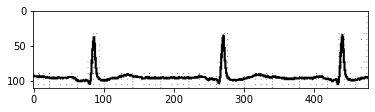

In [25]:
lead_I_img=crop_lead_I_ecg("ECG_TEST.jpg")
plt.imshow(lead_I_img,cmap="gray")

# Digitization of Single lead function

In [26]:
def digitize_lead_I(img):
    pixel_from_top=[]
    pixel_from_bottom=[]
    for i in range (0,478):
        id=0
        for j in range (0,110):
            if img[j][i]==0:
                pixel_from_top.append(j)
                id=1
                break
        if id==0:
            pixel_from_top.append(pixel_from_top[i-1])
    
    for i in range (0,478):
        pixel_from_bottom.append(110-pixel_from_top[i])
    return pixel_from_bottom

In [28]:
pixels=digitize_lead_I(lead_I_img)

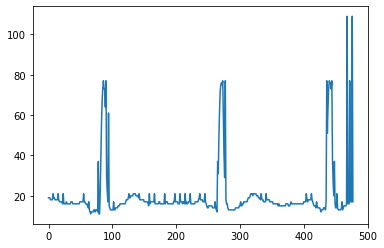

In [29]:
plt.plot(pixels)